In [68]:
import os
import pandas as pd

DATA_PATH = os.path.join("/home/sumandeep/Data/HandsOnML", "titanic")

def load_titanic_data(file_name):
    csv_path = os.path.join(DATA_PATH, file_name)
    return pd.read_csv(csv_path)

In [2]:
titanic_train = load_titanic_data("train.csv")
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic = titanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [9]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
titanic_num = titanic.drop(['Sex', 'Embarked'], axis=1)
titanic_num.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [16]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
titanic_num = pd.DataFrame(imputer.fit_transform(titanic_num), columns=titanic_num.columns, index=titanic_num.index)

titanic_num.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

titanic_sex = titanic[['Sex']]
titanic_sex = pd.DataFrame(ordinal_encoder.fit_transform(titanic_sex), columns=titanic_sex.columns, index=titanic_sex.index)
titanic_sex.head()

,Sex
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [24]:
imputer = SimpleImputer(strategy="most_frequent")
titanic_embarked = titanic[['Embarked']]
titanic_embarked = pd.DataFrame(imputer.fit_transform(titanic_embarked), columns=titanic_embarked.columns, index=titanic_embarked.index)
titanic_embarked.describe()

,Embarked
count,891
unique,3
top,S
freq,646


In [26]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
titanic_embarked_enc = onehot_encoder.fit_transform(titanic_embarked)
#titanic_embarked = pd.DataFrame(, columns=titanic_embarked.columns, index=titanic_embarked.index)
#titanic_embarked.head()
titanic_embarked_enc[:5].toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [43]:
def prepare_titanic_data(train, test):
    train = train[['Pclass', 'Age', 'SibSp',
                       'Parch', 'Fare', 'Sex', 'Embarked']]
    test = test[['Pclass', 'Age', 'SibSp',
                       'Parch', 'Fare', 'Sex', 'Embarked']]

    numeric_pipeline = Pipeline([
        ('numeric_imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])

    sex_pipeline = Pipeline([
        ('sex_encoder', OrdinalEncoder())
    ])

    embarked_pipeline = Pipeline([
        ('embarked_imputer', SimpleImputer(strategy="most_frequent")),
        ('embarked_encoder', OneHotEncoder())
    ])

    numeric_attribs = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
    sex_attribs = ['Sex']
    embarked_attribs = ['Embarked']

    full_pipeline = ColumnTransformer([
        ('num1', numeric_pipeline, numeric_attribs),
        ('cat1', sex_pipeline, sex_attribs),
        ('cat2', embarked_pipeline, embarked_attribs)
    ])

    full_pipeline.fit(train)
    return full_pipeline.transform(train), full_pipeline.transform(test)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer    
    
# unprepared training input
titanic = titanic_train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
# training labels
titanic_label = titanic_train['Survived'].copy()

titanic_prepared = prepare_titanic_data(titanic)
print(titanic_prepared.shape)
print(titanic_prepared[:5])

(891, 9)
[[ 0.82737724 -0.56573646  0.43279337 -0.47367361 -0.50244517  1.
   0.          0.          1.        ]
 [-1.56610693  0.66386103  0.43279337 -0.47367361  0.78684529  0.
   1.          0.          0.        ]
 [ 0.82737724 -0.25833709 -0.4745452  -0.47367361 -0.48885426  0.
   0.          0.          1.        ]
 [-1.56610693  0.4333115   0.43279337 -0.47367361  0.42073024  0.
   0.          0.          1.        ]
 [ 0.82737724  0.4333115  -0.4745452  -0.47367361 -0.48633742  1.
   0.          0.          1.        ]]


In [30]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(titanic_prepared, titanic_label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [32]:
from sklearn.model_selection import cross_val_score, cross_val_predict

titanic_scores = cross_val_predict(forest_clf, titanic_prepared, titanic_label, cv=3, method='predict_proba')

In [34]:
print(titanic_scores.shape)
print(titanic_label.shape)

(891, 2)
(891,)


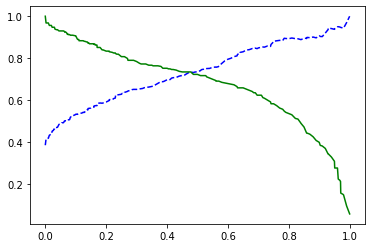

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_vs_threshold (precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')

precisions, recalls, thresholds = precision_recall_curve(titanic_label, titanic_scores[:,1])
plot_precision_recall_vs_threshold (precisions, recalls, thresholds)
plt.show()

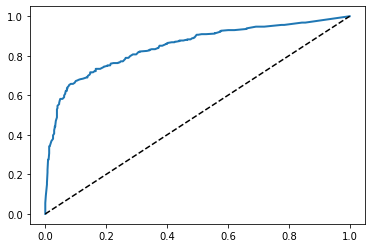

In [42]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')

fpr, tpr, thresholds = roc_curve(titanic_label, titanic_scores[:,1])
plot_roc_curve(fpr, tpr)
plt.show()

In [44]:
# raw dataframe
titanic_train = load_titanic_data("train.csv")
titanic_test = load_titanic_data("test.csv")

titanic_train_labels = titanic_train['Survived'].copy()
titanic_train_prepared, titanic_test_prepared = prepare_titanic_data(titanic_train, titanic_test)

In [45]:
classifier = RandomForestClassifier(random_state=42)

roc_auc_score 0.8468667114051066


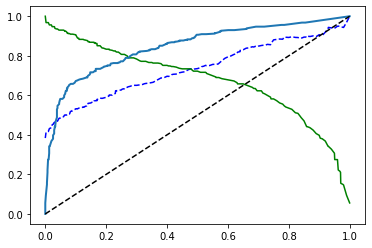

In [47]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

titanic_scores = cross_val_predict(
        classifier, titanic_train_prepared, titanic_train_labels, cv=3, method="predict_proba")

precisions, recalls, thresholds = precision_recall_curve(
        titanic_train_labels, titanic_scores[:, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

fpr, tpr, thresholds = roc_curve(titanic_train_labels, titanic_scores[:, 1])
plot_roc_curve(fpr, tpr)

print("roc_auc_score", roc_auc_score(titanic_train_labels, titanic_scores[:, 1]))

In [48]:
classifier.fit(titanic_train_prepared, titanic_train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [49]:
titanic_test_pred = classifier.predict(titanic_test_prepared)

In [50]:
titanic_test_pred[:5]

array([0, 0, 0, 1, 1])

In [65]:
titanic_test_solution = titanic_test[['PassengerId']]
titanic_test_solution.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [66]:
titanic_test_pred_df = pd.DataFrame(titanic_test_pred, columns=['Survived'], index=titanic_test_solution.index)
titanic_test_pred_df.head()

,Survived
0,0
1,0
2,0
3,1
4,1


In [67]:
titanic_test_solution = titanic_test_solution.join(titanic_test_pred_df)
titanic_test_solution.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [70]:
csv_path = os.path.join(DATA_PATH, 'submission.csv')
titanic_test_solution.to_csv(csv_path, index=False)